In [1]:
from neo import io
import neo
import numpy as np
from pathlib import Path
import matplotlib.pylab as plt 
import seaborn as sns
import plotly.express as px
import pandas as pd
from pathlib import Path
from scipy.signal import convolve
from scipy.signal.windows import triang
from sklearn.decomposition import PCA
from scipy import stats
from utils import *

In [2]:
# loading the data
spike_rows = []

for file in Path("./").glob("*.nio"):
    print(f"Leggo: {file.name}")
    reader = neo.io.NixIO(filename=str(file), mode="ro")
    block = reader.read_block()

    for seg_idx, segment in enumerate(block.segments):
        for st_idx, spiketrain in enumerate(segment.spiketrains):
            spike_times = spiketrain.times.rescale("ms").magnitude
            senders = spiketrain.annotations.get("senders", None)
            device = spiketrain.annotations.get("device", "unknown")
            pop_size = spiketrain.annotations.get("pop_size", None)

            if senders and len(senders) == len(spike_times):
                for time, sender in zip(spike_times, senders):
                    spike_rows.append({
                        "time_ms": time,
                        "sender_id": sender,
                        "pop": device.split('_')[0],
                        "segment": seg_idx,
                        "file": file.name
                    })
            else:
                for time in spike_times:
                    spike_rows.append({
                        "time_ms": time,
                        "sender_id": f"unit{st_idx}",
                        "pop": device.split('_')[0],
                        "segment": seg_idx,
                        "file": file.name
                    })

df_spikes = pd.DataFrame(spike_rows)
print("Pops:", df_spikes['pop'].unique())

Leggo: f5d958d9-6c30-44be-8757-ebd3421a4600.nio
Leggo: 889130cd-c4c6-49d4-9d9c-58d54698c942.nio
Leggo: 8a2b111a-4a89-4c11-8de4-c016ef0e0984.nio
Leggo: 96e1e91c-1573-4c53-a434-e7b0ec8c0e01.nio
Leggo: 82b0c816-2904-44b9-9e62-bdebef72af84.nio
Leggo: db7b6d82-5fdf-4300-a42b-5259c8faf815.nio
Leggo: ae9d7dd5-d037-46db-a427-11e42709917e.nio
Leggo: c7dea197-26e5-46ac-afed-3dab340f79e3.nio
Pops: ['mossy' 'glomerulus' 'granule' 'golgi' 'purkinje' 'basket' 'stellate'
 'background']


In [3]:
times_vectorPC, mean_ratePC, rates_per_neuronPC, stats_popPC, isi_dictPC, stats_dictPC = process_pop(df_spikes, "purkinje", color="blue", mask_flag=True, dt=5, sigma=50, plot=False)

Shape: (15825, 2)
[[7.6000e+00 3.2985e+04]
 [8.5000e+00 3.2977e+04]
 [8.9000e+00 3.2953e+04]
 ...
 [4.9911e+03 3.2951e+04]
 [4.9926e+03 3.3007e+04]
 [4.9990e+03 3.2959e+04]]
Computing firing rates of purkinje
Number of neurons: 68
Time vector: 0 5000.0
Number of bins: 1000
Kernel size: 20
Neuron ID: 32946.0
First few spikes: [ 9.7 26.3 51.4 75.2 97.2]
Neuron ID: 32947.0
First few spikes: [ 8.8 26.  49.9 72.9 90.1]
Neuron ID: 32948.0
First few spikes: [ 9.3 24.6 48.2 69.6 90.6]
Rates array shape: (68, 1000)
Rates array first few values: [[26. 31. 35. ... 35. 33. 29.]
 [27. 33. 37. ... 40. 37. 35.]
 [29. 35. 39. ... 33. 31. 28.]
 [27. 33. 37. ... 39. 37. 33.]
 [27. 33. 37. ... 35. 31. 25.]]
Rates array first few neurons: [[26. 31. 35. 37. 39.]
 [27. 33. 37. 39. 41.]
 [29. 35. 39. 41. 44.]
 [27. 33. 37. 39. 42.]
 [27. 33. 37. 39. 42.]
 [26. 31. 35. 37. 39.]
 [31. 37. 42. 46. 50.]
 [27. 33. 37. 39. 41.]
 [29. 35. 39. 41. 44.]
 [26. 31. 35. 37. 39.]
 [26. 31. 35. 37. 39.]
 [27. 33. 37. 39. 

In [4]:
%store -r neuronsON_fr

In [5]:
%store -r neuronsOFF_fr

In [10]:
%store -r neuronsON
%store -r neuronsOFF

In [7]:
neuronsON_fr

array([ 1,  2,  3,  4,  6, 10, 12, 13, 14, 16, 22, 26, 30, 31, 33, 37, 38,
       41, 42, 43, 44, 47, 48, 50, 52, 53, 54, 55, 56, 58, 64, 65, 66, 67])

Shape: (15825, 2)
[[7.6000e+00 3.2985e+04]
 [8.5000e+00 3.2977e+04]
 [8.9000e+00 3.2953e+04]
 ...
 [4.9911e+03 3.2951e+04]
 [4.9926e+03 3.3007e+04]
 [4.9990e+03 3.2959e+04]]
Computing firing rates of purkinje
Number of neurons: 68
Time vector: 0 5000.0
Number of bins: 1000
Kernel size: 4
Neuron ID: 32946.0
First few spikes: [ 9.7 26.3 51.4 75.2 97.2]
Neuron ID: 32947.0
First few spikes: [ 8.8 26.  49.9 72.9 90.1]
Neuron ID: 32948.0
First few spikes: [ 9.3 24.6 48.2 69.6 90.6]
Rates array shape: (68, 1000)
Rates array first few values: [[25. 75. 75. ... 25. 75. 75.]
 [25. 75. 75. ... 25. 25. 75.]
 [25. 75. 75. ... 25. 75. 75.]
 [25. 75. 75. ... 25. 75. 75.]
 [25. 75. 75. ... 75. 75. 25.]]
Rates array first few neurons: [[25. 75. 75. 25. 25.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 50. 75.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 50. 75.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 50. 75.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 25. 2

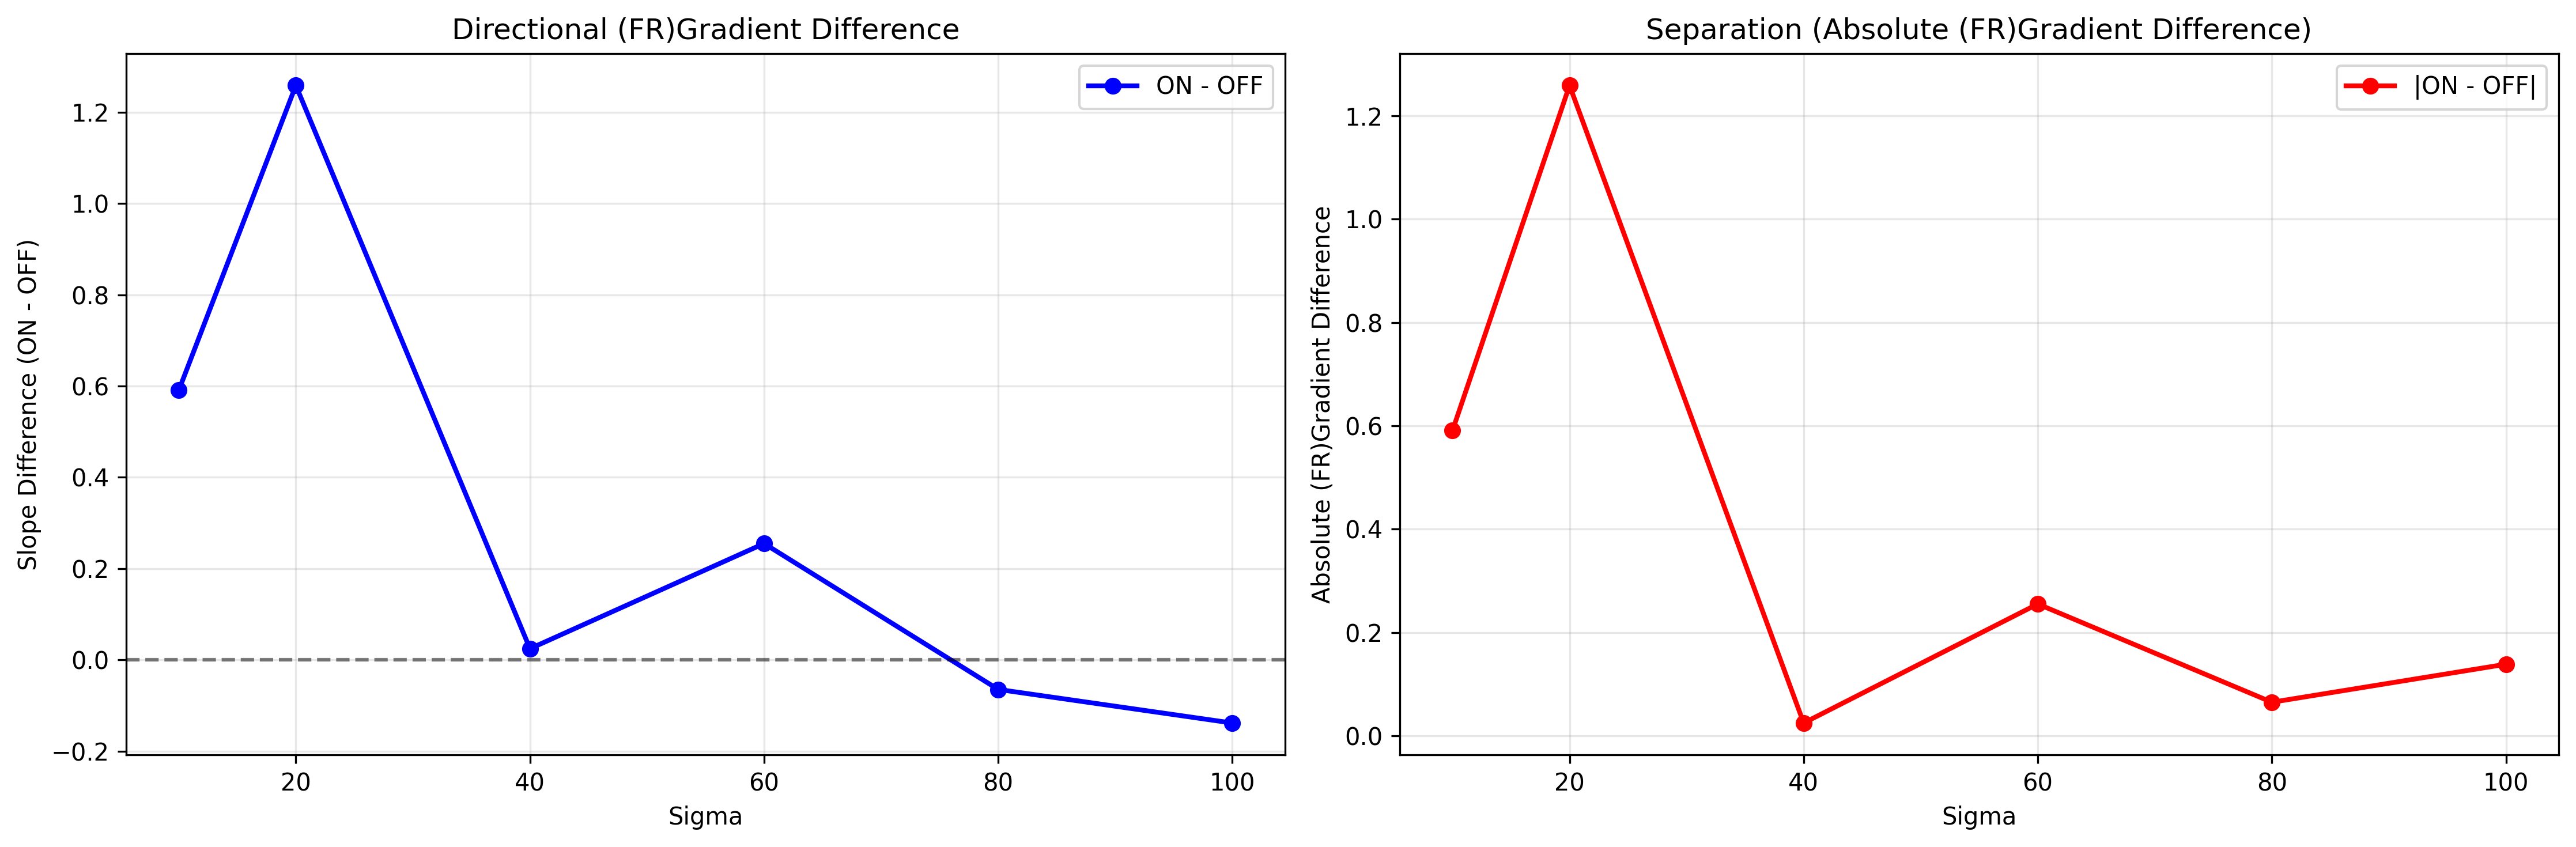

In [20]:
def firing_rate_gradient(neuronsON, neuronsOFF):
    sigmas = [10, 20, 40, 60, 80, 100]
    difference_gradients = []
    
    for sigma in sigmas:
        _, _, rates_per_neuron, _, _, _ = process_pop(df_spikes, "purkinje", color="blue", mask_flag=True, dt=5, sigma=sigma, plot=False)
        neuronsON_rates = rates_per_neuron[neuronsON]
        neuronsOFF_rates = rates_per_neuron[neuronsOFF]
        gradient_ratesON = np.gradient(neuronsON_rates, axis=1)
        magnitude_gradientON = np.mean(np.linalg.norm(gradient_ratesON, axis=1))
        # print(magnitude_gradientON.shape)
        gradient_ratesOFF = np.gradient(neuronsOFF_rates, axis=1)
        print(gradient_ratesOFF.shape)
        magnitude_gradientOFF = np.mean(np.linalg.norm(gradient_ratesOFF, axis=1))
        difference_gradient = magnitude_gradientON - magnitude_gradientOFF
        difference_gradients.append(difference_gradient)

    # (abs)
    abs_gradients_diff = np.abs(difference_gradients)
    sigma_max_separation = sigmas[np.argmax(abs_gradients_diff)]
    max_separation = np.max(abs_gradients_diff)
    
    sigma_max_directional = sigmas[np.argmax(difference_gradients)]
    max_directional = np.max(difference_gradients)
    
    sigma_min_directional = sigmas[np.argmin(difference_gradients)]
    min_directional = np.min(difference_gradients)
    
    print(f"\n=== RESULTS ===")
    print(f"Max separation (|diff|): σ={sigma_max_separation}, diff={max_separation:.3f}")
    print(f"Max directional diff: σ={sigma_max_directional}, diff={max_directional:.3f}")
    print(f"Min directional diff: σ={sigma_min_directional}, diff={min_directional:.3f}")
    
    # Plot comparativo
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=300)
    
    # Plot 1: Directional gradient difference
    axes[0].plot(sigmas, difference_gradients, 'bo-', label='ON - OFF', linewidth=2)
    axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[0].set_xlabel('Sigma')
    axes[0].set_ylabel('Slope Difference (ON - OFF)')
    axes[0].set_title('Directional (FR)Gradient Difference')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    
    # Plot 2: Abs values
    axes[1].plot(sigmas, abs_gradients_diff, 'ro-', label='|ON - OFF|', linewidth=2)
    axes[1].set_xlabel('Sigma')
    axes[1].set_ylabel('Absolute (FR)Gradient Difference')
    axes[1].set_title('Separation (Absolute (FR)Gradient Difference)')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

firing_rate_gradient(neuronsON, neuronsOFF)

In [12]:
from scipy.signal import welch

def compute_power_spectrum(rates_array, dt=0.1, nperseg=512):
    """
    Compute power spectrum using Welch's method.
    
    Args:
        rates_array: 2D numpy array of shape (n_neurons, n_time_bins)
        dt: time step in ms (from your firing rate computation)
        nperseg: length of each segment for Welch's method

    Returns:
        freqs: frequencies corresponding to the power spectrum (in Hz)
        psd: power spectral density values
    """
    dt_s = dt / 1000.0
    fs =  1 / dt_s  
    print(fs)
    
    psd = []
    
    for neuron_rates in rates_array:
        f, p = welch(neuron_rates, fs=fs, nperseg=nperseg, detrend='constant')
        psd.append(p)

    freqs = np.array(f)
    freqs = freqs[1:]
    psd = np.array(psd)[:, 1:]
    print(f"Computed power spectrum for {rates_array.shape[0]} neurons with {len(freqs)} frequency bins.")
    
    
    return freqs, psd

In [22]:
from fooof import FOOOF

def extract_fooof_features(psd_data, freqs):
    """
    Extract comprehensive FOOOF features for each Purkinje cell
    """
    n_peaks = 3
    all_features = []
    for cell, psd in enumerate(psd_data):
        cell_features = np.zeros(n_peaks * 3 + 2 + 1)
        peak_params = []
        fm = FOOOF(peak_width_limits=(22, 1500))
        fm.fit(freqs, psd)
        print(f"For cell {cell}")
        print(f"error of the model: {fm.error_:.4f}")
        print(f"R^2 of the model: {fm.r_squared_:.4f}\n")

        # aperiodic parameters
        aperiodic_params = fm.get_params('aperiodic_params')
        offset = aperiodic_params[0]
        exponent = aperiodic_params[1]
        
        # peak parameters
        peak_ = fm.get_params('peak_params')
        if len(peak_) > 0:
            arg_peak = peak_[peak_[:, 1].argsort()[::-1]]
            sorted_peaks = arg_peak[:n_peaks, :]

            for i , peak in enumerate(sorted_peaks):
                cell_features[i*3:(i+1)*3] = peak
        
        cell_features[-3] = offset
        cell_features[-2] = exponent
        cell_features[-1] = np.sum(psd)  # total power
        all_features.append(cell_features)

    all_features = np.array(all_features)
    print(f"Extracted FOOOF features shape: {all_features.shape}")
    return all_features

Shape: (15825, 2)
[[7.6000e+00 3.2985e+04]
 [8.5000e+00 3.2977e+04]
 [8.9000e+00 3.2953e+04]
 ...
 [4.9911e+03 3.2951e+04]
 [4.9926e+03 3.3007e+04]
 [4.9990e+03 3.2959e+04]]
Computing firing rates of purkinje
Number of neurons: 68
Time vector: 0 5000.0
Number of bins: 1000
Kernel size: 4
Neuron ID: 32946.0
First few spikes: [ 9.7 26.3 51.4 75.2 97.2]
Neuron ID: 32947.0
First few spikes: [ 8.8 26.  49.9 72.9 90.1]
Neuron ID: 32948.0
First few spikes: [ 9.3 24.6 48.2 69.6 90.6]
Rates array shape: (68, 1000)
Rates array first few values: [[25. 75. 75. ... 25. 75. 75.]
 [25. 75. 75. ... 25. 25. 75.]
 [25. 75. 75. ... 25. 75. 75.]
 [25. 75. 75. ... 25. 75. 75.]
 [25. 75. 75. ... 75. 75. 25.]]
Rates array first few neurons: [[25. 75. 75. 25. 25.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 50. 75.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 50. 75.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 50. 75.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 25. 25.]
 [25. 75. 75. 25. 2

/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y,

For cell 1
error of the model: 0.6877
R^2 of the model: 0.7292

For cell 2
error of the model: 0.7054
R^2 of the model: 0.6983

For cell 3
error of the model: 0.8895
R^2 of the model: 0.6069

For cell 4
error of the model: 0.7553
R^2 of the model: 0.6950

For cell 5
error of the model: 0.9835
R^2 of the model: 0.5564

For cell 6
error of the model: 0.9143
R^2 of the model: 0.5903

For cell 7
error of the model: 0.9364
R^2 of the model: 0.5742

For cell 8
error of the model: 0.7184
R^2 of the model: 0.6840

For cell 9
error of the model: 0.9097
R^2 of the model: 0.5889

For cell 10
error of the model: 0.7282
R^2 of the model: 0.6829

For cell 11
error of the model: 0.9575
R^2 of the model: 0.5713

For cell 12
error of the model: 0.7634
R^2 of the model: 0.6826

For cell 13
error of the model: 0.7588
R^2 of the model: 0.6795

For cell 14
error of the model: 0.7609
R^2 of the model: 0.7080

For cell 15
error of the model: 0.7781
R^2 of the model: 0.6613

For cell 16
error of the model: 0.

/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y,

For cell 1
error of the model: 0.6128
R^2 of the model: 0.7497

For cell 2
error of the model: 0.6308
R^2 of the model: 0.7331

For cell 3
error of the model: 0.6158
R^2 of the model: 0.7228

For cell 4
error of the model: 0.6281
R^2 of the model: 0.7624

For cell 5
error of the model: 0.7536
R^2 of the model: 0.6671

For cell 6
error of the model: 0.7482
R^2 of the model: 0.6772

For cell 7
error of the model: 0.6430
R^2 of the model: 0.7217

For cell 8
error of the model: 0.6787
R^2 of the model: 0.6973

For cell 9
error of the model: 0.6177
R^2 of the model: 0.7627

For cell 10
error of the model: 0.5930
R^2 of the model: 0.7698

For cell 11
error of the model: 0.7165
R^2 of the model: 0.6954

For cell 12
error of the model: 0.7131
R^2 of the model: 0.6811

For cell 13
error of the model: 0.7518
R^2 of the model: 0.6759

For cell 14
error of the model: 0.6839
R^2 of the model: 0.7230

For cell 15
error of the model: 0.6789
R^2 of the model: 0.7114

For cell 16
error of the model: 0.

/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y,

For cell 0
error of the model: 0.6706
R^2 of the model: 0.7685

For cell 1
error of the model: 0.7134
R^2 of the model: 0.7582

For cell 2
error of the model: 0.6445
R^2 of the model: 0.7798

For cell 3
error of the model: 0.8766
R^2 of the model: 0.6221

For cell 4
error of the model: 0.5936
R^2 of the model: 0.8247

For cell 5
error of the model: 0.5632
R^2 of the model: 0.8376

For cell 6
error of the model: 0.7038
R^2 of the model: 0.7734

For cell 7
error of the model: 0.6297
R^2 of the model: 0.7803

For cell 8
error of the model: 0.7005
R^2 of the model: 0.7492

For cell 9
error of the model: 0.6548
R^2 of the model: 0.7771

For cell 10
error of the model: 0.6390
R^2 of the model: 0.7785

For cell 11
error of the model: 0.7123
R^2 of the model: 0.7685

For cell 12
error of the model: 0.6376
R^2 of the model: 0.7919

For cell 13
error of the model: 0.6247
R^2 of the model: 0.8018

For cell 14
error of the model: 0.7089
R^2 of the model: 0.7493

For cell 15
error of the model: 0.8

/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y,

For cell 0
error of the model: 0.5840
R^2 of the model: 0.8350

For cell 1
error of the model: 0.5797
R^2 of the model: 0.8310

For cell 2
error of the model: 0.5791
R^2 of the model: 0.8238

For cell 3
error of the model: 0.7719
R^2 of the model: 0.7153

For cell 4
error of the model: 0.6885
R^2 of the model: 0.7861

For cell 5
error of the model: 0.5676
R^2 of the model: 0.8489

For cell 6
error of the model: 0.6260
R^2 of the model: 0.8176

For cell 7
error of the model: 0.5701
R^2 of the model: 0.8286

For cell 8
error of the model: 0.9029
R^2 of the model: 0.6120

For cell 9
error of the model: 0.5914
R^2 of the model: 0.8255

For cell 10
error of the model: 0.5609
R^2 of the model: 0.8251

For cell 11
error of the model: 0.6018
R^2 of the model: 0.8226

For cell 12
error of the model: 0.6017
R^2 of the model: 0.8242

For cell 13
error of the model: 0.6033
R^2 of the model: 0.8219

For cell 14
error of the model: 0.6067
R^2 of the model: 0.8448

For cell 15
error of the model: 0.7

/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y,

For cell 0
error of the model: 0.6444
R^2 of the model: 0.7993

For cell 1
error of the model: 0.6075
R^2 of the model: 0.8138

For cell 2
error of the model: 0.6043
R^2 of the model: 0.8225

For cell 3
error of the model: 0.6154
R^2 of the model: 0.8059

For cell 4
error of the model: 0.6077
R^2 of the model: 0.8263

For cell 5
error of the model: 0.6707
R^2 of the model: 0.7937

For cell 6
error of the model: 0.6433
R^2 of the model: 0.8171

For cell 7
error of the model: 0.5915
R^2 of the model: 0.8246

For cell 8
error of the model: 0.6067
R^2 of the model: 0.8302

For cell 9
error of the model: 0.6120
R^2 of the model: 0.8138

For cell 10
error of the model: 0.5914
R^2 of the model: 0.8185

For cell 11
error of the model: 0.6547
R^2 of the model: 0.8098

For cell 12
error of the model: 0.6412
R^2 of the model: 0.8179

For cell 13
error of the model: 0.6888
R^2 of the model: 0.7647

For cell 14
error of the model: 0.6135
R^2 of the model: 0.8308

For cell 15
error of the model: 0.6

/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/nix/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  freqs, _, Pxy = _spectral_helper(x, y,

For cell 0
error of the model: 0.5570
R^2 of the model: 0.8518

For cell 1
error of the model: 0.7461
R^2 of the model: 0.7520

For cell 2
error of the model: 0.6174
R^2 of the model: 0.8249

For cell 3
error of the model: 0.6061
R^2 of the model: 0.8111

For cell 4
error of the model: 0.7069
R^2 of the model: 0.7699

For cell 5
error of the model: 0.6511
R^2 of the model: 0.8053

For cell 6
error of the model: 0.5917
R^2 of the model: 0.8475

For cell 7
error of the model: 0.6318
R^2 of the model: 0.8219

For cell 8
error of the model: 0.5816
R^2 of the model: 0.8348

For cell 9
error of the model: 0.5331
R^2 of the model: 0.8505

For cell 10
error of the model: 0.6113
R^2 of the model: 0.8196

For cell 11
error of the model: 0.6257
R^2 of the model: 0.8140

For cell 12
error of the model: 0.6061
R^2 of the model: 0.8364

For cell 13
error of the model: 0.5741
R^2 of the model: 0.8482

For cell 14
error of the model: 0.5203
R^2 of the model: 0.8662

For cell 15
error of the model: 0.8

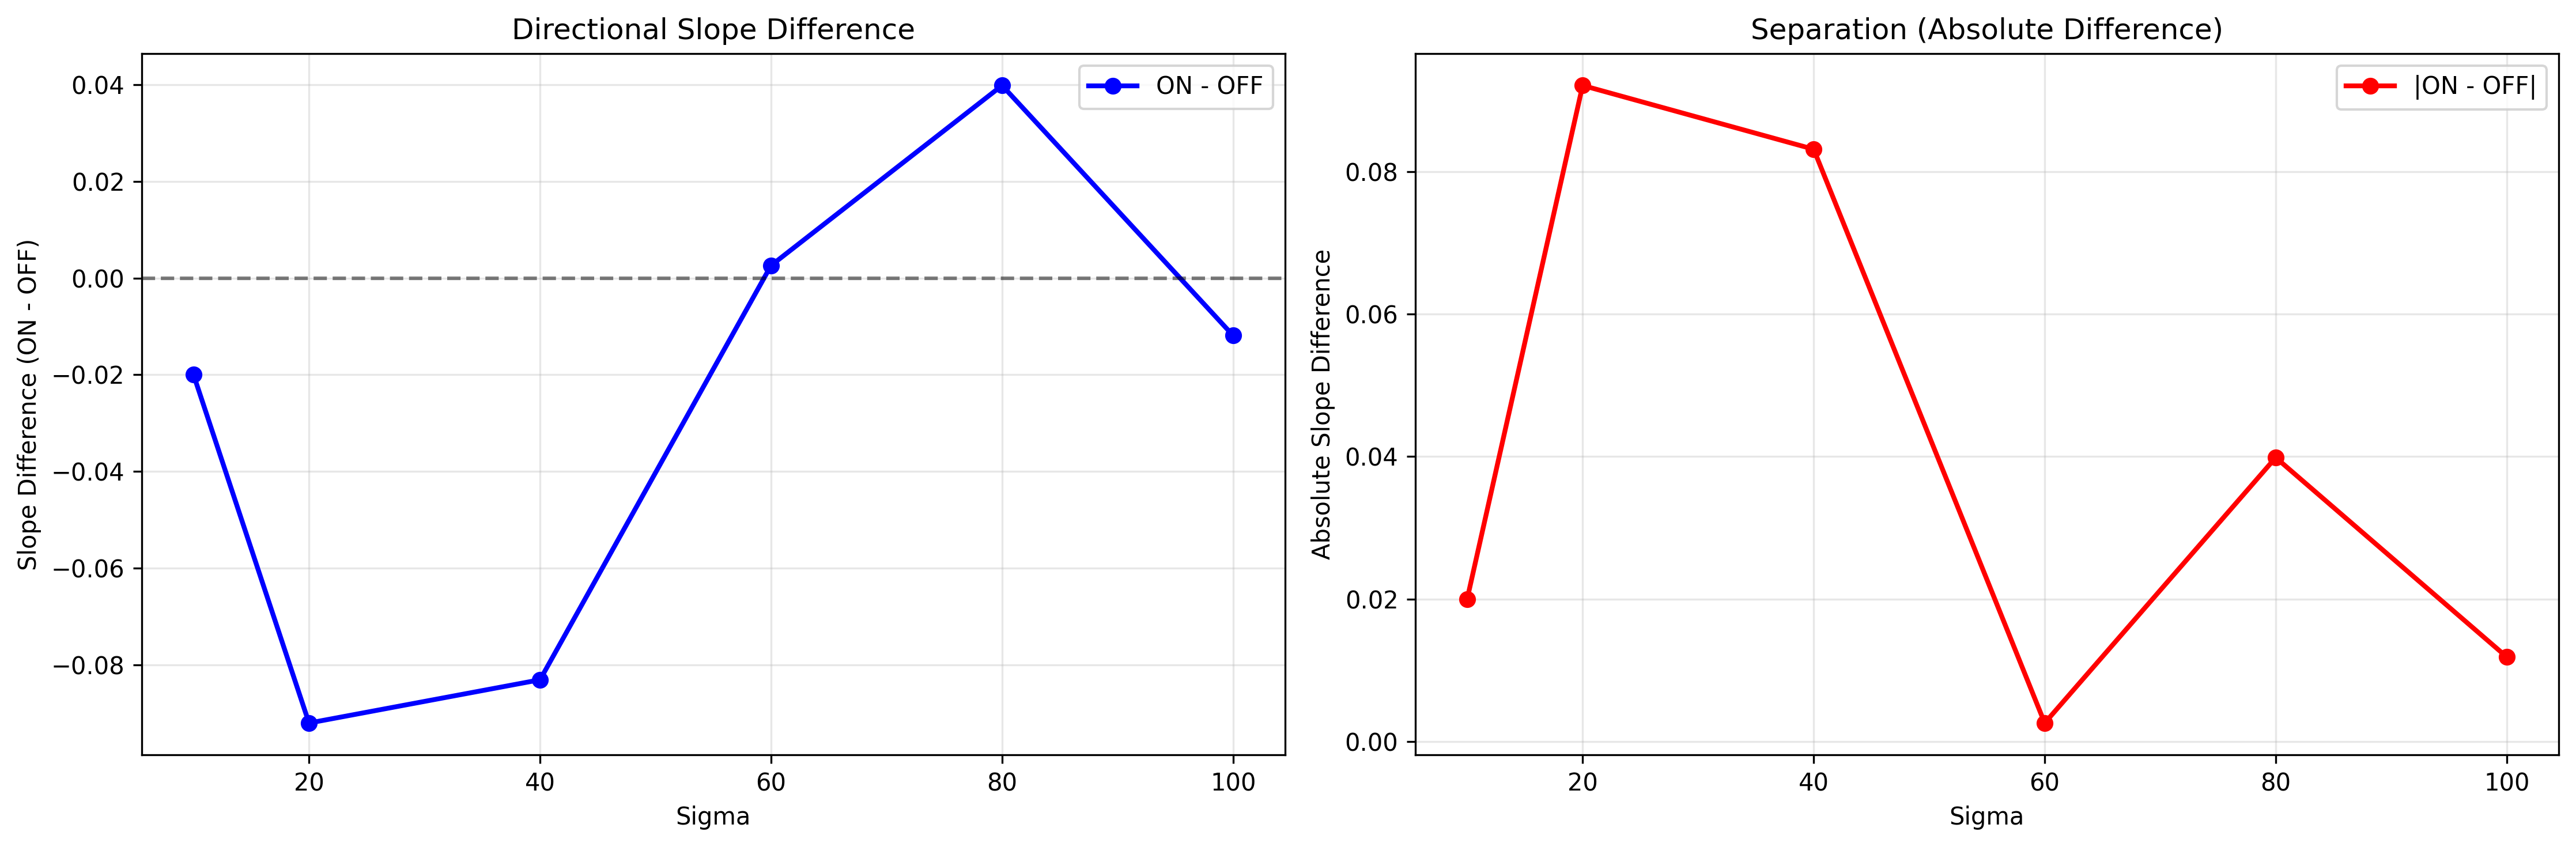

In [23]:
def sigma_value_aperiodic_slope(neuronsON, neuronsOFF):
    sigmas = [10, 20, 40, 60, 80, 100]
    slopes_diff = np.zeros(len(sigmas))
    slopesON_all = np.zeros(len(sigmas))
    slopesOFF_all = np.zeros(len(sigmas))
    
    for idx, sigma in enumerate(sigmas):
        _, _, rates_per_neuron, _, _, _ = process_pop(df_spikes, "purkinje", 
                                                     color="blue", mask_flag=True, 
                                                     dt=5, sigma=sigma, plot=False)
        
        freqsON, psd_dataON = compute_power_spectrum(rates_per_neuron[neuronsON], 
                                                     dt=0.1, nperseg=1024)
        freqsOFF, psd_dataOFF = compute_power_spectrum(rates_per_neuron[neuronsOFF], 
                                                       dt=0.1, nperseg=1024)
        
        featuresON = extract_fooof_features(psd_dataON, freqsON)
        featuresOFF = extract_fooof_features(psd_dataOFF, freqsOFF)
        
        slopeON = np.mean(featuresON[:, -2])
        slopeOFF = np.mean(featuresOFF[:, -2])
        
        slopesON_all[idx] = slopeON
        slopesOFF_all[idx] = slopeOFF
        slopes_diff[idx] = slopeON - slopeOFF
    
    # Analizza SENZA abs() prima
    print("=== ANALISI DETTAGLIATA ===")
    for i, sigma in enumerate(sigmas):
        direction = "ON > OFF" if slopes_diff[i] > 0 else "OFF > ON"
        print(f"Sigma {sigma}: ON={slopesON_all[i]:.3f}, OFF={slopesOFF_all[i]:.3f}, "
              f"Diff={slopes_diff[i]:.3f} ({direction})")
    
    # (abs)
    abs_slopes_diff = np.abs(slopes_diff)
    sigma_max_separation = sigmas[np.argmax(abs_slopes_diff)]
    max_separation = np.max(abs_slopes_diff)
    
    # (w/o abs)
    sigma_max_directional = sigmas[np.argmax(slopes_diff)]
    max_directional = np.max(slopes_diff)
    
    sigma_min_directional = sigmas[np.argmin(slopes_diff)]
    min_directional = np.min(slopes_diff)
    
    print(f"\n===RESULTS===")
    print(f"Max separation is abs (|diff|): σ={sigma_max_separation}, diff={max_separation:.3f}")
    print(f"Max directional diff: σ={sigma_max_directional}, diff={max_directional:.3f}")
    print(f"Min directional diff: σ={sigma_min_directional}, diff={min_directional:.3f}")
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=300)
    
    # Original values plot
    axes[0].plot(sigmas, slopes_diff, 'bo-', label='ON - OFF', linewidth=2)
    axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[0].set_xlabel('Sigma')
    axes[0].set_ylabel('Slope Difference (ON - OFF)')
    axes[0].set_title('Directional Slope Difference')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    
    # Absolute values plot
    axes[1].plot(sigmas, abs_slopes_diff, 'ro-', label='|ON - OFF|', linewidth=2)
    axes[1].set_xlabel('Sigma')
    axes[1].set_ylabel('Absolute Slope Difference')
    axes[1].set_title('Separation (Absolute Difference)')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    return {
        'sigma_max_separation': sigma_max_separation,
        'sigma_max_directional': sigma_max_directional,
        'sigma_min_directional': sigma_min_directional,
        'slopes_ON': slopesON_all,
        'slopes_OFF': slopesOFF_all,
        'slopes_diff': slopes_diff,
        'abs_slopes_diff': abs_slopes_diff
    }

# Esegui l'analisi completa
results = sigma_value_aperiodic_slope(neuronsON_fr, neuronsOFF_fr)